In [2]:
from keras.models import load_model, Model
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

## Visualizing intermediate activations

In [3]:
model = load_model('small_cnn2.h5')
model.summary()

2023-03-09 17:13:22.916488: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-03-09 17:13:22.916521: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: kk21
2023-03-09 17:13:22.916527: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: kk21
2023-03-09 17:13:22.916673: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.86.1
2023-03-09 17:13:22.916692: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.86.1
2023-03-09 17:13:22.916696: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.86.1
2023-03-09 17:13:22.916970: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (on

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

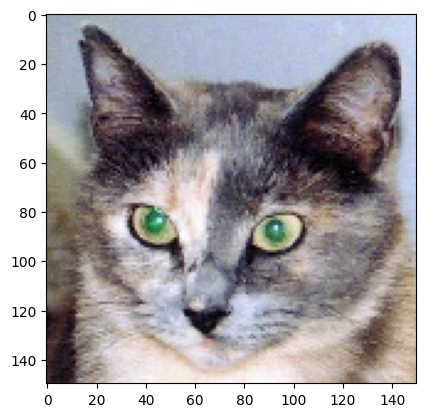

In [4]:
img_path = "cats_and_dogs/test/cats/cat.1700.jpg"
img = load_img(img_path, target_size=(150,150))
img_tensor = np.array(img) / 255
img_tensor = np.expand_dims(img_tensor, axis=0)
plt.imshow(img_tensor[0])
plt.show()

In [5]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [6]:
layer_outputs

[<KerasTensor: shape=(None, 148, 148, 32) dtype=float32 (created by layer 'conv2d_4')>,
 <KerasTensor: shape=(None, 74, 74, 32) dtype=float32 (created by layer 'max_pooling2d_4')>,
 <KerasTensor: shape=(None, 72, 72, 64) dtype=float32 (created by layer 'conv2d_5')>,
 <KerasTensor: shape=(None, 36, 36, 64) dtype=float32 (created by layer 'max_pooling2d_5')>,
 <KerasTensor: shape=(None, 34, 34, 128) dtype=float32 (created by layer 'conv2d_6')>,
 <KerasTensor: shape=(None, 17, 17, 128) dtype=float32 (created by layer 'max_pooling2d_6')>,
 <KerasTensor: shape=(None, 15, 15, 128) dtype=float32 (created by layer 'conv2d_7')>,
 <KerasTensor: shape=(None, 7, 7, 128) dtype=float32 (created by layer 'max_pooling2d_7')>]

In [12]:
activations = activation_model.predict(img_tensor)
first_layer_activarion = activations[0]
activations[0].shape

1/1 [==============================] - 0s 24ms/step


(1, 148, 148, 32)

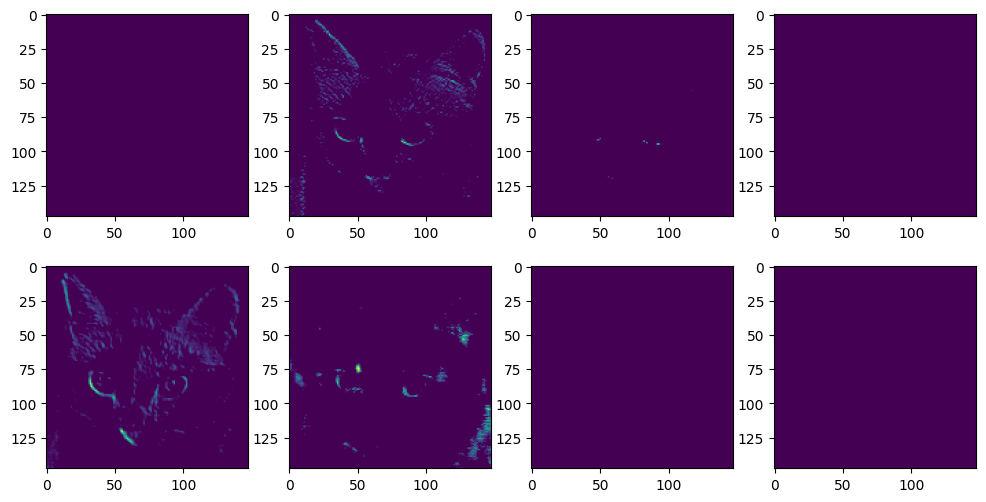

In [32]:
fig, axarr = plt.subplots(2,4,figsize=(12,6))
for i in range(4):
    for j in range(2):
        axarr[j,i].imshow(first_layer_activarion[0, :, :, i*2+j], cmap='viridis')